In [136]:
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
from mijngeluid import fft_partitioned

sd.query_devices()

   0 Microsoft-geluidstoewijzing - Input, MME (2 in, 0 out)
>  1 Microfoon (USB Audio Device ), MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Microsoft-geluidstoewijzing - Output, MME (0 in, 2 out)
<  4 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   5 Luidsprekers (USB Audio Device , MME (0 in, 2 out)
   6 Headphones (Realtek HD Audio 2nd output), Windows WDM-KS (0 in, 2 out)
   7 Microfoonmatrix (Realtek HD Audio Mic input), Windows WDM-KS (2 in, 0 out)
   8 Mic in at front panel (black) (Mic in at front panel (black)), Windows WDM-KS (2 in, 0 out)
   9 Speakers 1 (Realtek HD Audio output with HAP), Windows WDM-KS (0 in, 2 out)
  10 Speakers 2 (Realtek HD Audio output with HAP), Windows WDM-KS (0 in, 2 out)
  11 Pc-luidspreker (Realtek HD Audio output with HAP), Windows WDM-KS (2 in, 0 out)
  12 Stereo-mix (Realtek HD Audio Stereo input), Windows WDM-KS (2 in, 0 out)
  13 Luidsprekers (USB Audio Device), Windows WDM-KS (0 in, 2 out)
  14 Microfoon (

In [131]:
fs = 44100 # sample rate, zie microfoon specificaties
duration = 10 # in seconden
arr = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64', device=14) # <- verander hier het getal zoals aangegeven bij stap 10, neemt op in de achtergrond
sd.wait() #zorgt dat de code wacht met het resultaat

arr.shape #geeft het resultaat

(441000, 1)

In [127]:
df = fft_partitioned(arr[:,0], fs, duration, t_bin=1e-2) # maakt een tabel die je hieronder kan zien na het uitvoeren van deze code, t_bin is de bin grootte in seconden
df["I"]= 10*np.log10(df["y"] / 10**-12) # maakt van de geluidsintensiteit in a.u. (arbitrary units), geluidsintensiteit in dB
df #laat de tabel zien

,t,x,y,I
0,0.01,0.000000,0.000557,87.462309
1,0.01,100.684932,0.000190,82.786039
2,0.01,201.369863,0.000225,83.529650
3,0.01,302.054795,0.000130,81.152835
4,0.01,402.739726,0.000052,77.122573
...,...,...,...,...
215,10.00,21647.260274,0.000006,67.405772
216,10.00,21747.945205,0.000006,68.090892
217,10.00,21848.630137,0.000004,65.988544
218,10.00,21949.315068,0.000004,65.804501


(70.0, 110.0)

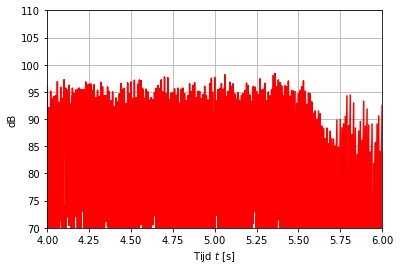

In [139]:
plt.plot(df.t, df.I, 'r-') # maakt een grafiek van de tijd in seconde tegen de geluidsintensiteit in dB, r- zorgt voor de rode kleur
plt.grid() #geeft lijntjes in de hele grafiek zodat aflezen makkelijker wordt
plt.xlabel(r"Tijd $t$ [s]") #geeft een label bij de x-as
plt.ylabel(r"dB") #geeft een label bij de y-as
plt.xlim(4, 6) #de limieten die je zelf kan aanpassen naar eigen wens voor de x-as
plt.ylim(70, 110) # "" "" voor de x-as